[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 Accuracy: 0.9501016737056155

 Classification Report:
               precision    recall  f1-score   support

    negative       0.95      1.00      0.97      5937
    positive       0.91      0.33      0.49       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393



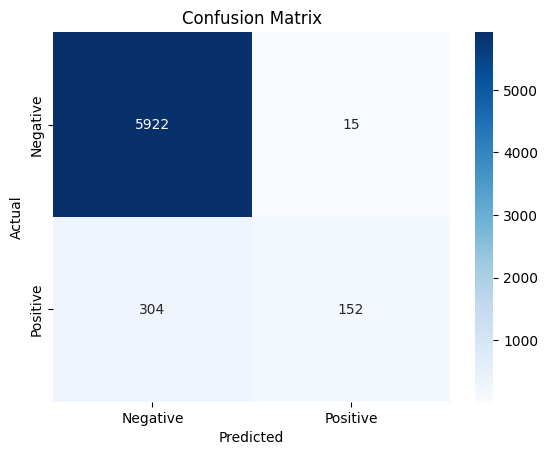

In [1]:
# Sentiment Analysis using TF-IDF and Logistic Regression

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Load Dataset (Replace with your actual dataset path or use a sample)
# Assuming a CSV with 'review' and 'sentiment' columns
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)[['tweet', 'label']]
df.columns = ['review', 'sentiment']  # Rename for clarity
df['sentiment'] = df['sentiment'].map({0: 'negative', 1: 'positive'})

#  Inspect data
df.head()

#  Preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Lowercase
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)
df.head()

#  TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

#  Evaluation
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()